# Chronic Kidney Disease

In [1]:
import pandas as pd
import ehrapy as ep
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc https://raw.githubusercontent.com/odsti/datasets/master/ckd/processed/ckd_full.csv

File 'ckd_full.csv' already there; not retrieving.



# Data Wrangling

In [4]:
data = pd.read_csv("ckd_full.csv")

Since the dataset does not have a patient ID we add one.

In [5]:
data["Patient_id"] = range(1, len(data) + 1)

We replace nomial feartures with integers.

In [6]:
data["Red Blood Cells"].replace(("normal", "abnormal"), (0, 1), inplace=True)
data["Pus Cell"].replace(("normal", "abnormal"), (0, 1), inplace=True)
data["Pus Cell clumps"].replace(("notpresent", "present"), (0, 1), inplace=True)
data["Bacteria"].replace(("notpresent", "present"), (0, 1), inplace=True)
data["Hypertension"].replace(("no", "yes"), (0, 1), inplace=True)
data["Diabetes Mellitus"].replace(("no", "yes"), (0, 1), inplace=True)
data["Coronary Artery Disease"].replace(("no", "yes"), (0, 1), inplace=True)
data["Appetite"].replace(("good", "poor"), (0, 1), inplace=True)
data["Pedal Edema"].replace(("no", "yes"), (0, 1), inplace=True)
data["Anemia"].replace(("no", "yes"), (0, 1), inplace=True)
data["Class"].replace(("notckd", "ckd"), (0, 1), inplace=True)

In [7]:
data.set_index("Patient_id", inplace=True)

In [8]:
data.to_csv("chronic_kidney_disease_prepared.csv")

## ehrapy sanity check

In [9]:
adata = ep.io.read_csv("chronic_kidney_disease_prepared.csv",
                   index_column="Patient_id")

2023-01-18 19:04:45,772 - root INFO - Added all columns to `obs`.
2023-01-18 19:04:45,785 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `400` x `25`.


In [10]:
adata.var_names

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [11]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 400 obs and 25 vars
╚══ 🔓 Unencoded variables
    ╠══ Age -> data type: floating
    ╠══ Blood Pressure -> data type: floating
    ╠══ Specific Gravity -> data type: floating
    ╠══ Albumin -> data type: floating
    ╠══ Sugar -> data type: floating
    ╠══ Red Blood Cells -> data type: floating
    ╠══ Pus Cell -> data type: floating
    ╠══ Pus Cell clumps -> data type: floating
    ╠══ Bacteria -> data type: floating
    ╠══ Blood Glucose Random -> data type: floating
    ╠══ Blood Urea -> data type: floating
    ╠══ Serum Creatinine -> data type: floating
    ╠══ Sodium -> data type: floating
    ╠══ Potassium -> data type: floating
    ╠══ Hemoglobin -> data type: floating
    ╠══ Packed Cell Volume -> data type: floating
    ╠══ White Blood Cell Count -> data type: floating
    ╠══ Red Blood Cell Count -> data type: floating
    ╠══ Hypertension -> data type: floating
    ╠══ Diabetes Mellitus -> data type: floating
    ╠══ Coronary Artery Disease -> data type: floating
    ╠══ Appetite -> data type: floating
    ╠══ Pedal Edema -> data type: floating
    ╠══ Anemia -> data type: floating
    ╚══ Class -> data type: floating

In [12]:
_ = ep.pp.qc_metrics(adata)

2023-01-18 19:04:46,041 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


In [13]:
adata.obs

,missing_values_abs,missing_values_pct
Patient_id,,
1,3,12.0
2,5,20.0
3,3,12.0
4,0,0.0
5,2,8.0
...,...,...
396,0,0.0
397,0,0.0
398,0,0.0


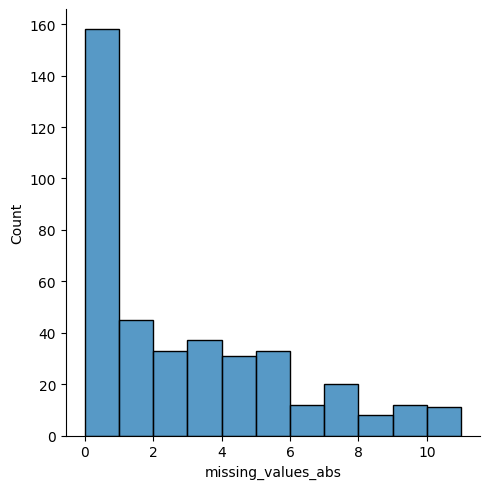

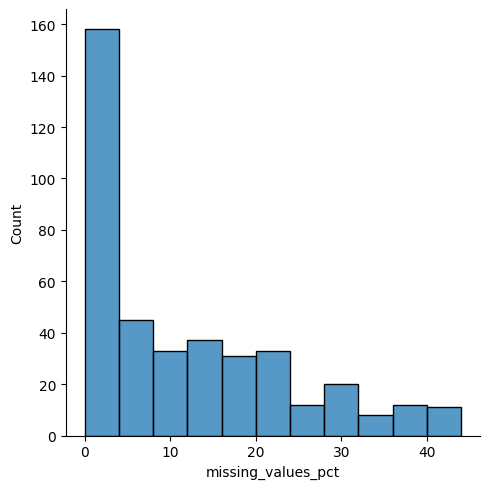

In [14]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])

In [15]:
adata.var

,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max
Age,9,2.25,51.483376,55.00,17.147743,2.000,90.000000
Blood Pressure,12,3.00,76.469070,80.00,13.665992,50.000,180.000000
Specific Gravity,47,11.75,1.017408,1.02,0.005709,1.005,1.025000
Albumin,46,11.50,1.016949,0.00,1.350767,0.000,5.000000
Sugar,49,12.25,0.450142,0.00,1.097624,0.000,5.000000
Red Blood Cells,152,38.00,0.189516,0.00,0.391918,0.000,1.000000
Pus Cell,65,16.25,0.226866,0.00,0.418805,0.000,1.000000
Pus Cell clumps,4,1.00,0.106061,0.00,0.307915,0.000,1.000000
Bacteria,4,1.00,0.055556,0.00,0.229061,0.000,1.000000
Blood Glucose Random,44,11.00,148.036514,121.00,79.170288,22.000,490.000000


Feature Red Blood Cell Count had more than 32.75% missing values!

Feature Red Blood Cells had more than 38.00% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

2023-01-18 19:04:46,852 - root INFO - Column names for numeric variables ['Diabetes Mellitus', 'Serum Creatinine', 'Appetite', 'Sugar', 'Specific Gravity', 'Albumin', 'Bacteria', 'Anemia', 'Blood Glucose Random', 'Blood Pressure', 'Red Blood Cells', 'Blood Urea', 'Potassium', 'Pus Cell', 'Coronary Artery Disease', 'Hemoglobin', 'Red Blood Cell Count', 'Sodium', 'Packed Cell Volume', 'Hypertension', 'Age', 'Class', 'Pus Cell clumps', 'Pedal Edema', 'White Blood Cell Count'] were replaced.


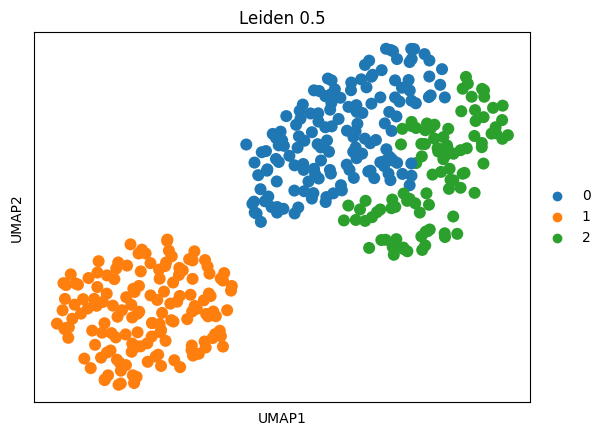

In [16]:
ep.pp.knn_impute(adata)
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

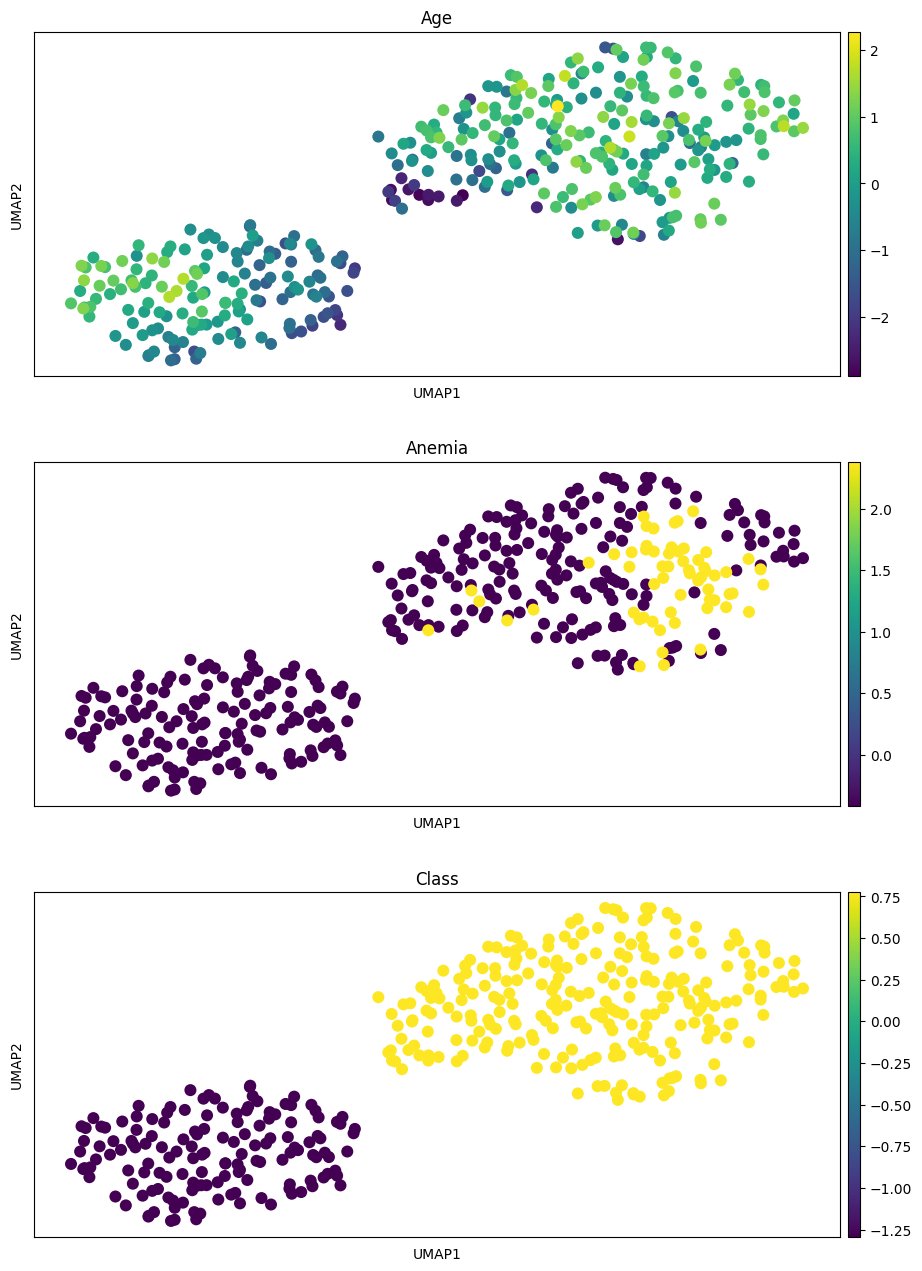

In [17]:
ep.pl.umap(adata, color=["Age", "Anemia", "Class",], ncols=1, wspace=0.75)